In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
all_games = pd.read_csv("games_metadata.csv")
print(all_games.shape)
print(all_games.columns)
all_games.head()

(1000, 9)
Index(['PlayerOne', 'PlayerTwo', 'Dictionary', 'ScorePlayerOne',
       'ScorePlayerTwo', 'NumTurns', 'MaxScore', 'MinScore', 'MeanScore'],
      dtype='object')


,PlayerOne,PlayerTwo,Dictionary,ScorePlayerOne,ScorePlayerTwo,NumTurns,MaxScore,MinScore,MeanScore
0,Toh Weibin,Ryan Wee,CSW21,442,467,27,95,5,33.67
1,Ryan Wee,Tony Sim,CSW21,520,368,26,86,0,34.15
2,Ryan Wee,Rajesh,CSW21,565,394,34,104,0,35.10
3,Ryan Wee,Poh Ying Ming,CSW21,393,399,25,84,5,31.68
4,Matthew O'Connor,Justin Morris,CSW21,378,305,29,45,0,23.55


In [4]:
all_games.rename(columns = {"MeanScore": "AvgTurnScore"}, inplace = True)
all_games = all_games.drop_duplicates(keep=False).reset_index(drop = True)

print(f"New df shape: {all_games.shape}") # 29 duplicate games
print(f"Number of rows containing null values: {all_games.isna().sum().sum()}") # No NA values

New df shape: (971, 9)
Number of rows containing null values: 0


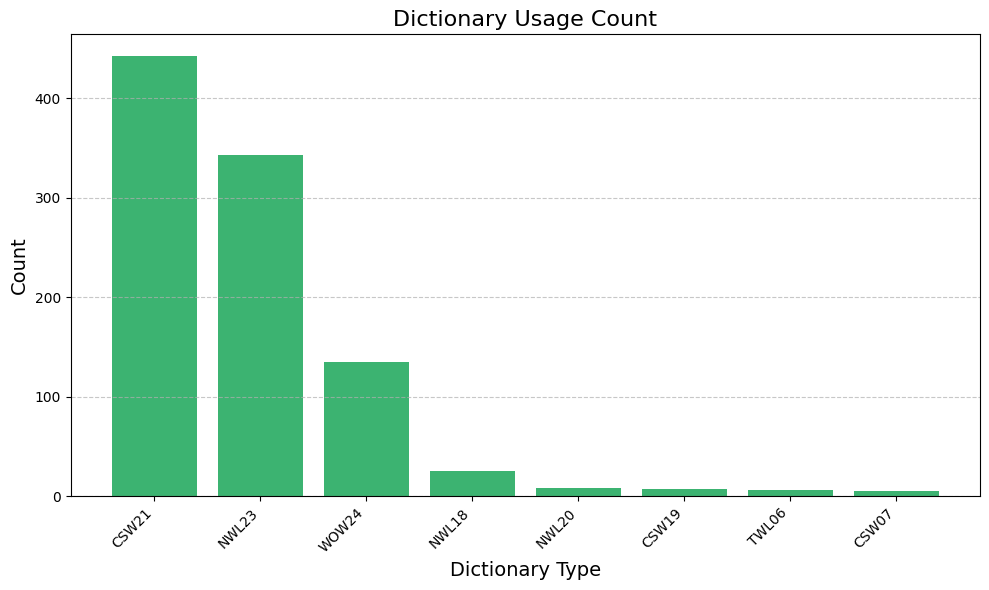

In [58]:
dictionary_count = pd.value_counts(all_games["Dictionary"])

plt.figure(figsize=(10, 6))
plt.bar(dictionary_count.index, dictionary_count.values, color='mediumseagreen')

plt.title('Dictionary Usage Count', fontsize=16)
plt.xlabel('Dictionary Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

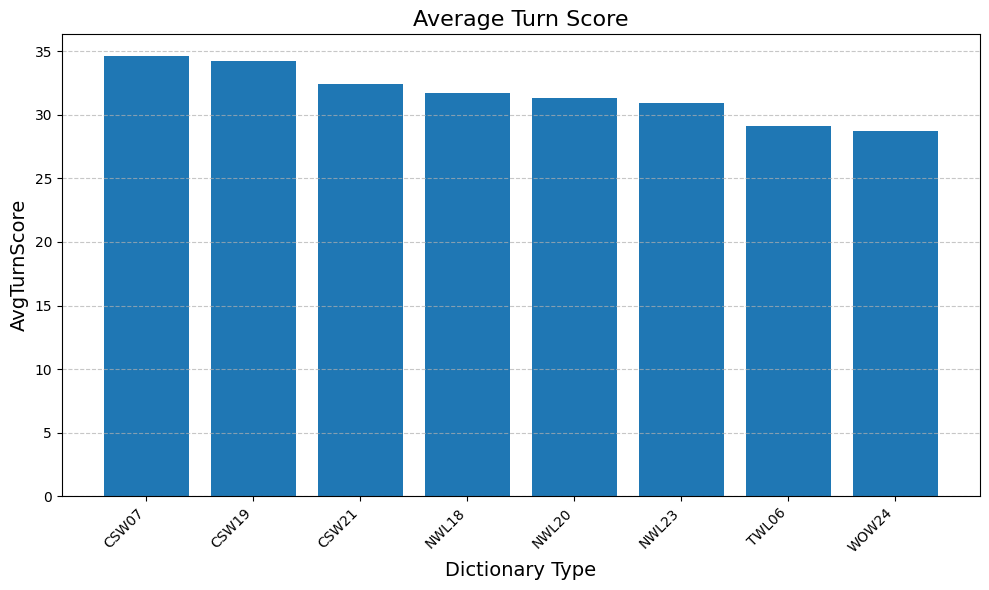

In [83]:
# Mean max and min plays and avg score per turn by dictionary

dictionary_means = all_games.groupby(["Dictionary"]).mean(numeric_only=True)[["NumTurns", "MaxScore", "MinScore", "AvgTurnScore"]]
dictionary_means["Dictionary"] = dictionary_means.index

plt.figure(figsize=(10, 6))
plt.bar(dictionary_means["Dictionary"], dictionary_means["AvgTurnScore"].sort_values(ascending=False))

plt.title('Average Turn Score', fontsize=16)
plt.xlabel('Dictionary Type', fontsize=14)
plt.ylabel('AvgTurnScore', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
